In [1]:
import numpy as np
import csv
import random
import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt('./Datasets/q1/train.csv', delimiter=',').astype(int)

In [3]:
a = data.shape
n1 = int(0.8*a[0])
n2 = a[1]

In [4]:
np.random.shuffle(data)

In [5]:
train_data = data[0:n1,:]
validation_data = data[n1:a[0],:]

In [6]:
x_train = train_data[:,1:n2]
y_train = train_data[:,0]

In [7]:
x_validation = validation_data[:,1:n2]
y_validation = validation_data[:,0]

In [8]:
def euclidean_distance(a, b):
    dist = np.linalg.norm(a-b)
    return dist

In [9]:
def manhattan_distance(a, b):
    n = a.shape
    dist = 0
    for i in range(0,n[1]):
        dist += math.abs(a[i]-b[i])
        
    return dist

In [10]:
def knnClassifier(validation_point, k):
    distance = []

    for train_point in x_train:
        distance.append(euclidean_distance(train_point, validation_point))
        
    idx = np.argpartition(distance, k)
    
    y_predicted = []
    
    for i in range(0,k):
        y_predicted.append(y_train[np.where(idx == i)])
#     ans = random.choice(y_predicted)
    
    d = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}
    
    for i in y_predicted:
        d[int(i)] += 1
    
    ans = max(d, key=d.get)
        
    return int(ans)

In [12]:
accuracy = []
f1scores = []
for k in range(1, 10):
    y_predicted = []
    for i in x_validation:
        y_predicted.append(knnClassifier(i, k))
    
    accuracy.append(accuracy_score(y_validation, y_predicted))
    f1scores.append(f1_score(y_validation, y_predicted, average=None))

In [13]:
print(accuracy)

[0.9605, 0.94775, 0.1695, 0.20925, 0.24, 0.24525, 0.256, 0.26975, 0.273]


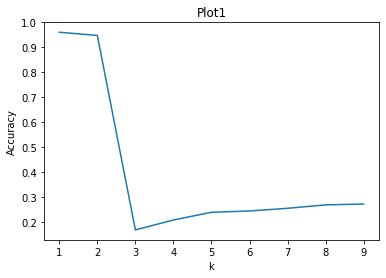

In [14]:
k = [1,2,3,4,5,6,7,8,9]
plt.plot(k, accuracy)  
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Plot1')
plt.show() 

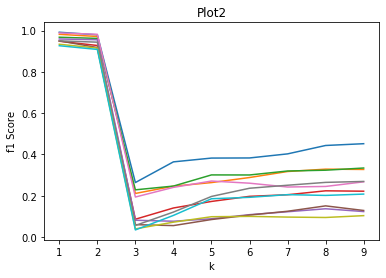

In [15]:
k = [1,2,3,4,5,6,7,8,9]
plt.plot(k, f1scores)  
plt.xlabel('k')
plt.ylabel('f1 Score')
plt.title('Plot2')
plt.show() 